In [2]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer, MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge
import pandas as pd


In [3]:
from palmerpenguins import load_penguins
# Carrega o dataset como um DataFrame do pandas
df = load_penguins()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
# Verifica a quantidade de nullos em body_mass_g
print(df['body_mass_g'].isnull().sum())

2


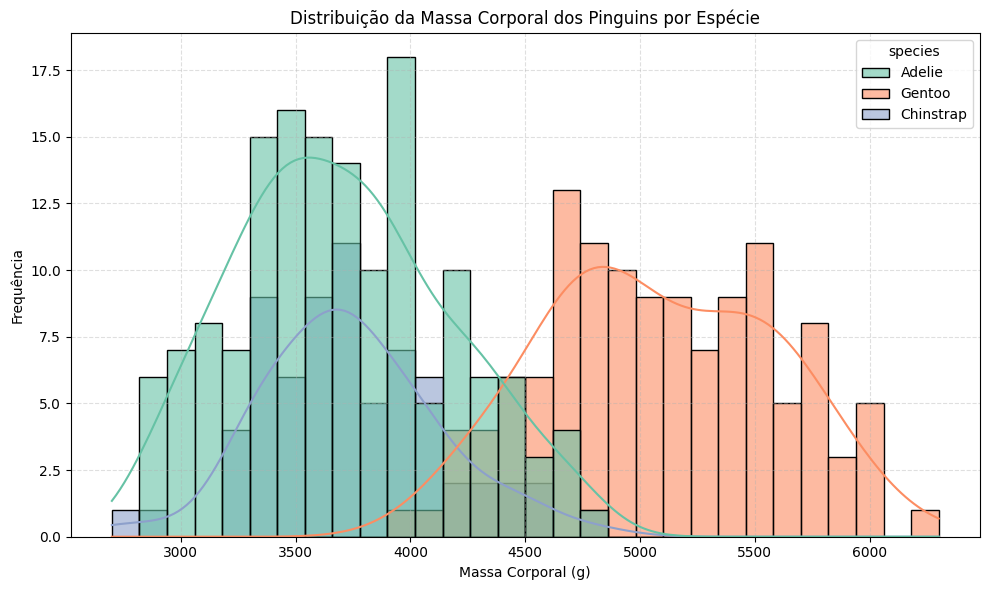

In [4]:
#Verifica a distribuição da frequencias de penguis por especie e body_mass_g

# Gráfico de distribuição da massa corporal, separado por espécie
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='body_mass_g', hue='species', kde=True, bins=30, palette='Set2', alpha=0.6)

plt.title('Distribuição da Massa Corporal dos Pinguins por Espécie')
plt.xlabel('Massa Corporal (g)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


  species  body_mass_g faixa_peso
0  Adelie       3750.0      medio
1  Adelie       3800.0      medio
2  Adelie       3250.0       leve
4  Adelie       3450.0       leve
5  Adelie       3650.0       leve


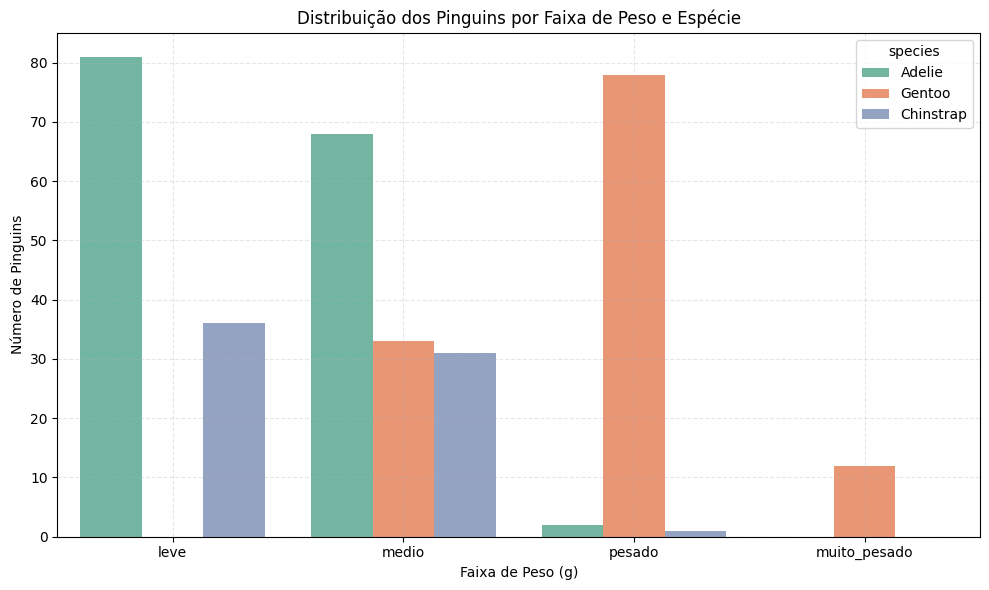

In [7]:
# Remove valores ausentes de body_mass_g
df = df[['species', 'body_mass_g']].dropna()

# Define os bins e os rótulos
bins = [2700, 3700, 4700, 5700, 6500]
labels = ['leve', 'medio', 'pesado', 'muito_pesado']

# Aplica a discretização
df['faixa_peso'] = pd.cut(df['body_mass_g'], bins=bins, labels=labels, include_lowest=True)

# Visualiza as primeiras linhas discretizadas
print(df.head())

# Plota a nova distribuição com a faixa de peso
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='faixa_peso', hue='species', palette='Set2')

plt.title('Distribuição dos Pinguins por Faixa de Peso e Espécie')
plt.xlabel('Faixa de Peso (g)')
plt.ylabel('Número de Pinguins')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


   body_mass_g massa_quantil
0       3750.0         medio
1       3800.0         medio
2       3250.0          leve
4       3450.0          leve
5       3650.0         medio


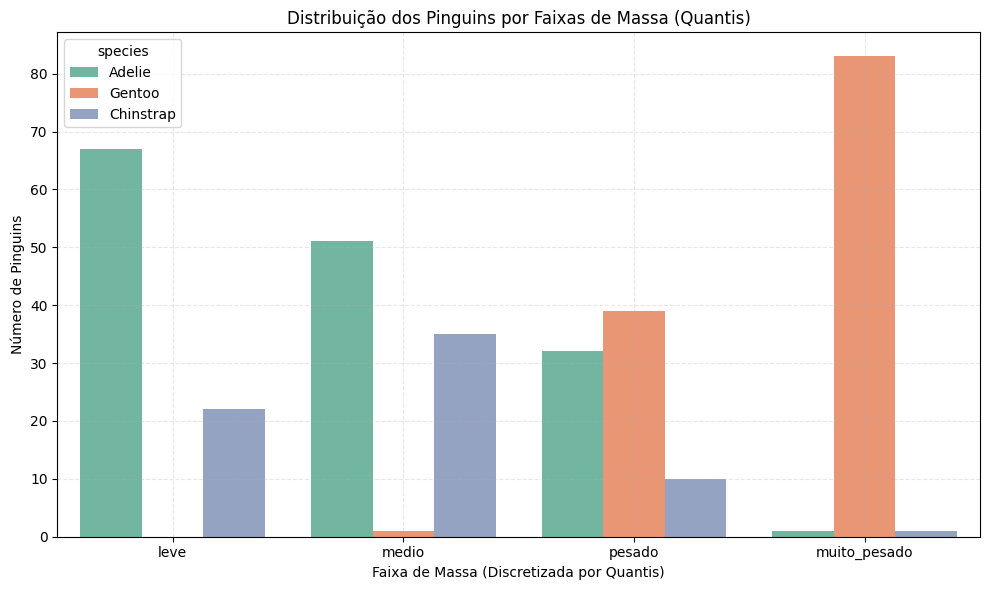

In [8]:


# Discretiza em 4 bins por quantis (mesmo número de pinguins por faixa)
df['massa_quantil'] = pd.qcut(df['body_mass_g'], q=4, labels=['leve', 'medio', 'pesado', 'muito_pesado'])

# Visualiza as primeiras linhas
print(df[['body_mass_g', 'massa_quantil']].head())

# Plota distribuição da nova discretização por espécie
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='massa_quantil', hue='species', palette='Set2')

plt.title('Distribuição dos Pinguins por Faixas de Massa (Quantis)')
plt.xlabel('Faixa de Massa (Discretizada por Quantis)')
plt.ylabel('Número de Pinguins')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/home/afect/miniconda3/envs/infnet-ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


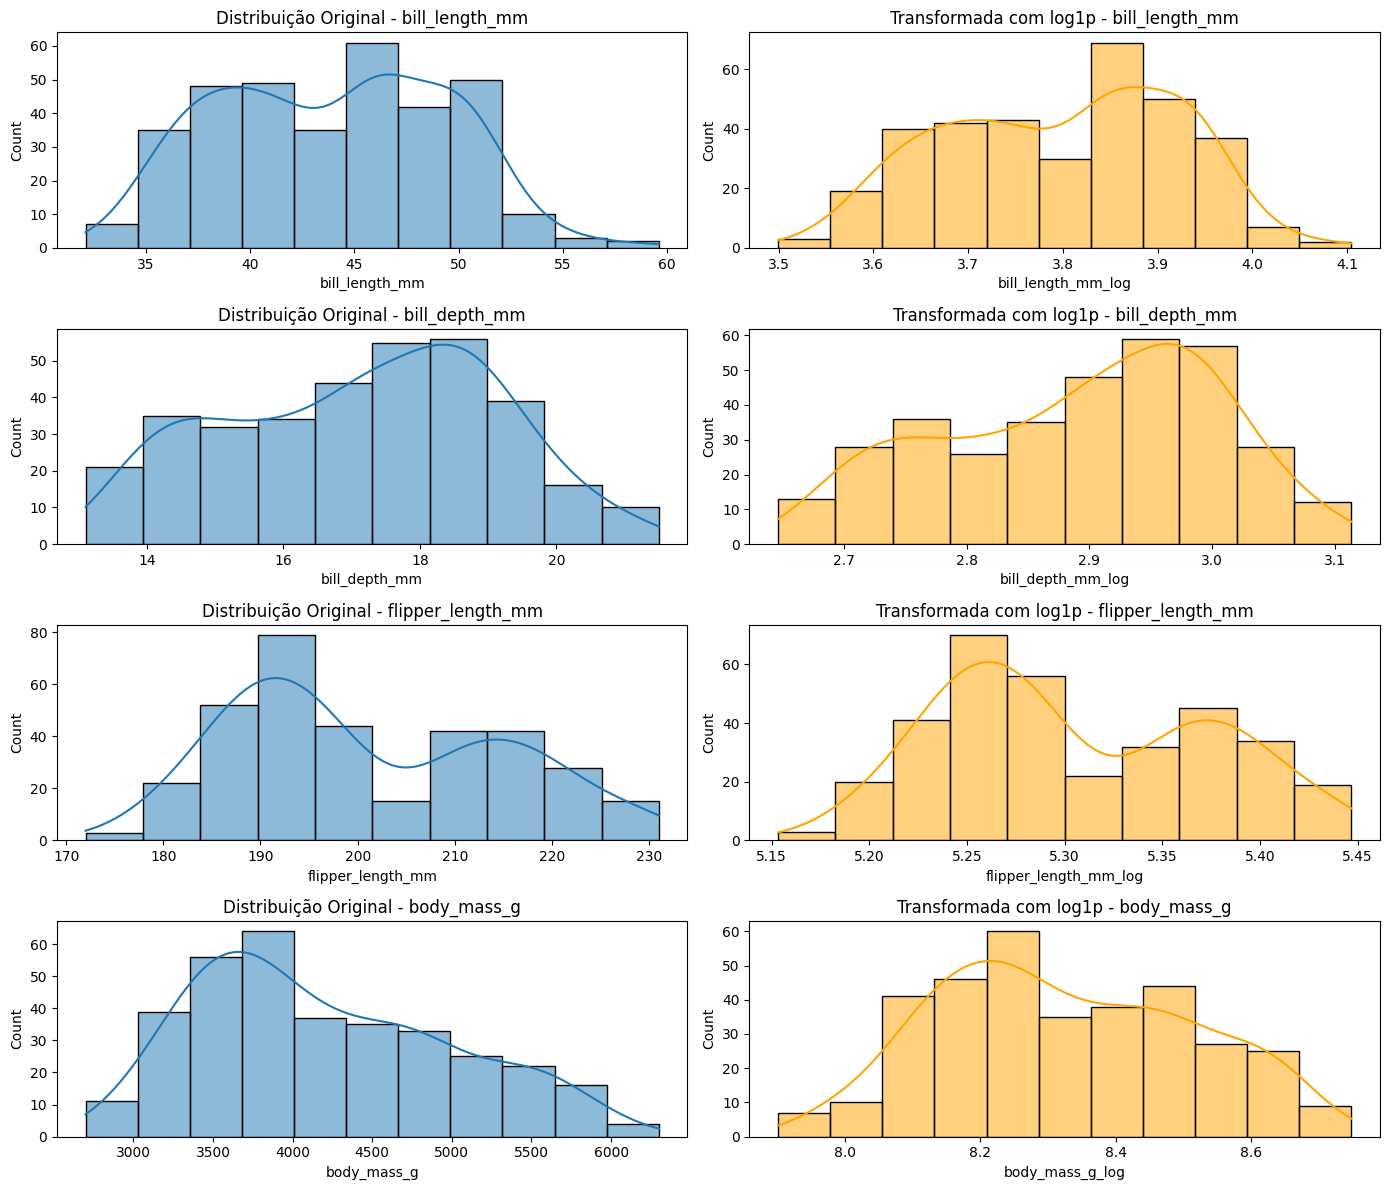

In [9]:


# Carrega os dados
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[variaveis].dropna()

# Define transformador log1p
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Aplica o log1p em todas as variáveis selecionadas
df_log = pd.DataFrame(
    log_transformer.transform(df),
    columns=[col + '_log' for col in df.columns]
)

# Junta com as variáveis originais para comparação
df_completo = pd.concat([df, df_log], axis=1)

# Exibe comparação visual entre distribuições originais e transformadas
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

for i, var in enumerate(variaveis):
    sns.histplot(df[var], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f'Distribuição Original - {var}')
    
    sns.histplot(df_log[var + '_log'], kde=True, color='orange', ax=axs[i][1])
    axs[i][1].set_title(f'Transformada com log1p - {var}')

plt.tight_layout()
plt.show()


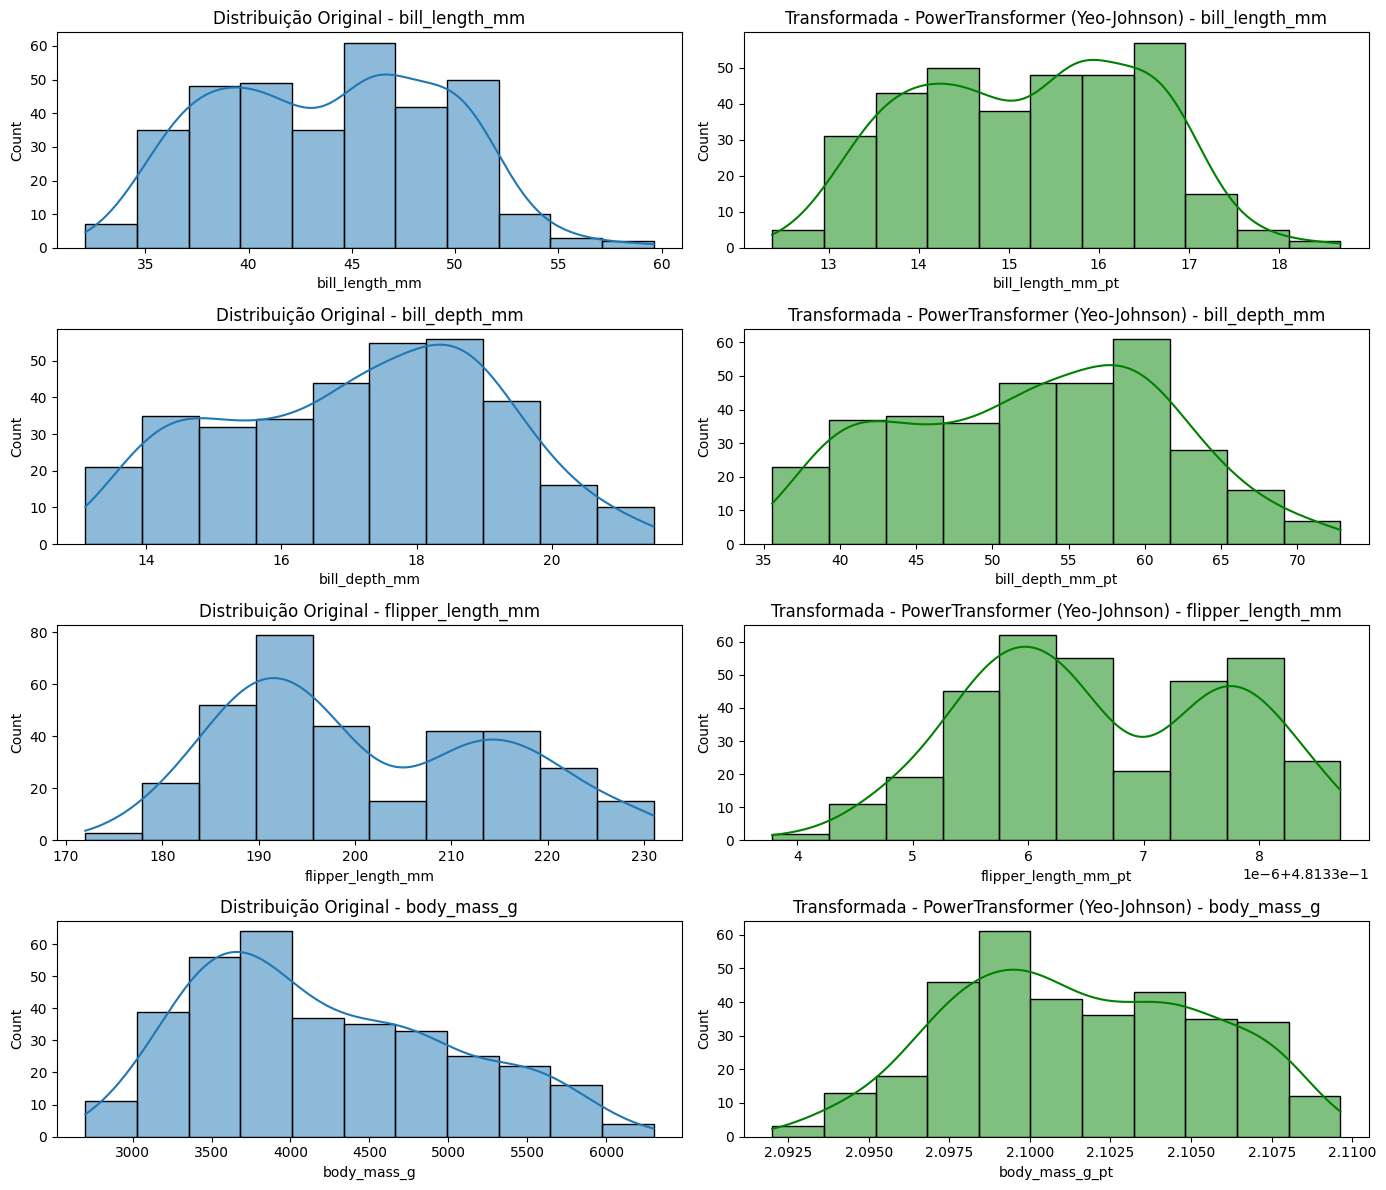

In [10]:
# Carregar os dados e selecionar variáveis contínuas
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[variaveis].dropna()

# Inicializa o PowerTransformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Aplica transformação a todas as variáveis selecionadas
df_transformadas = pd.DataFrame(
    pt.fit_transform(df),
    columns=[col + '_pt' for col in df.columns]
)

# Junta os dados transformados aos originais
df_completo = pd.concat([df, df_transformadas], axis=1)

# Visualização das distribuições antes e depois
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

for i, var in enumerate(variaveis):
    sns.histplot(df[var], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f'Distribuição Original - {var}')
    
    sns.histplot(df_transformadas[var + '_pt'], kde=True, color='green', ax=axs[i][1])
    axs[i][1].set_title(f'Transformada - PowerTransformer (Yeo-Johnson) - {var}')

plt.tight_layout()
plt.show()

/home/afect/miniconda3/envs/infnet-ml/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (342). n_quantiles is set to n_samples.
  warnings.warn(


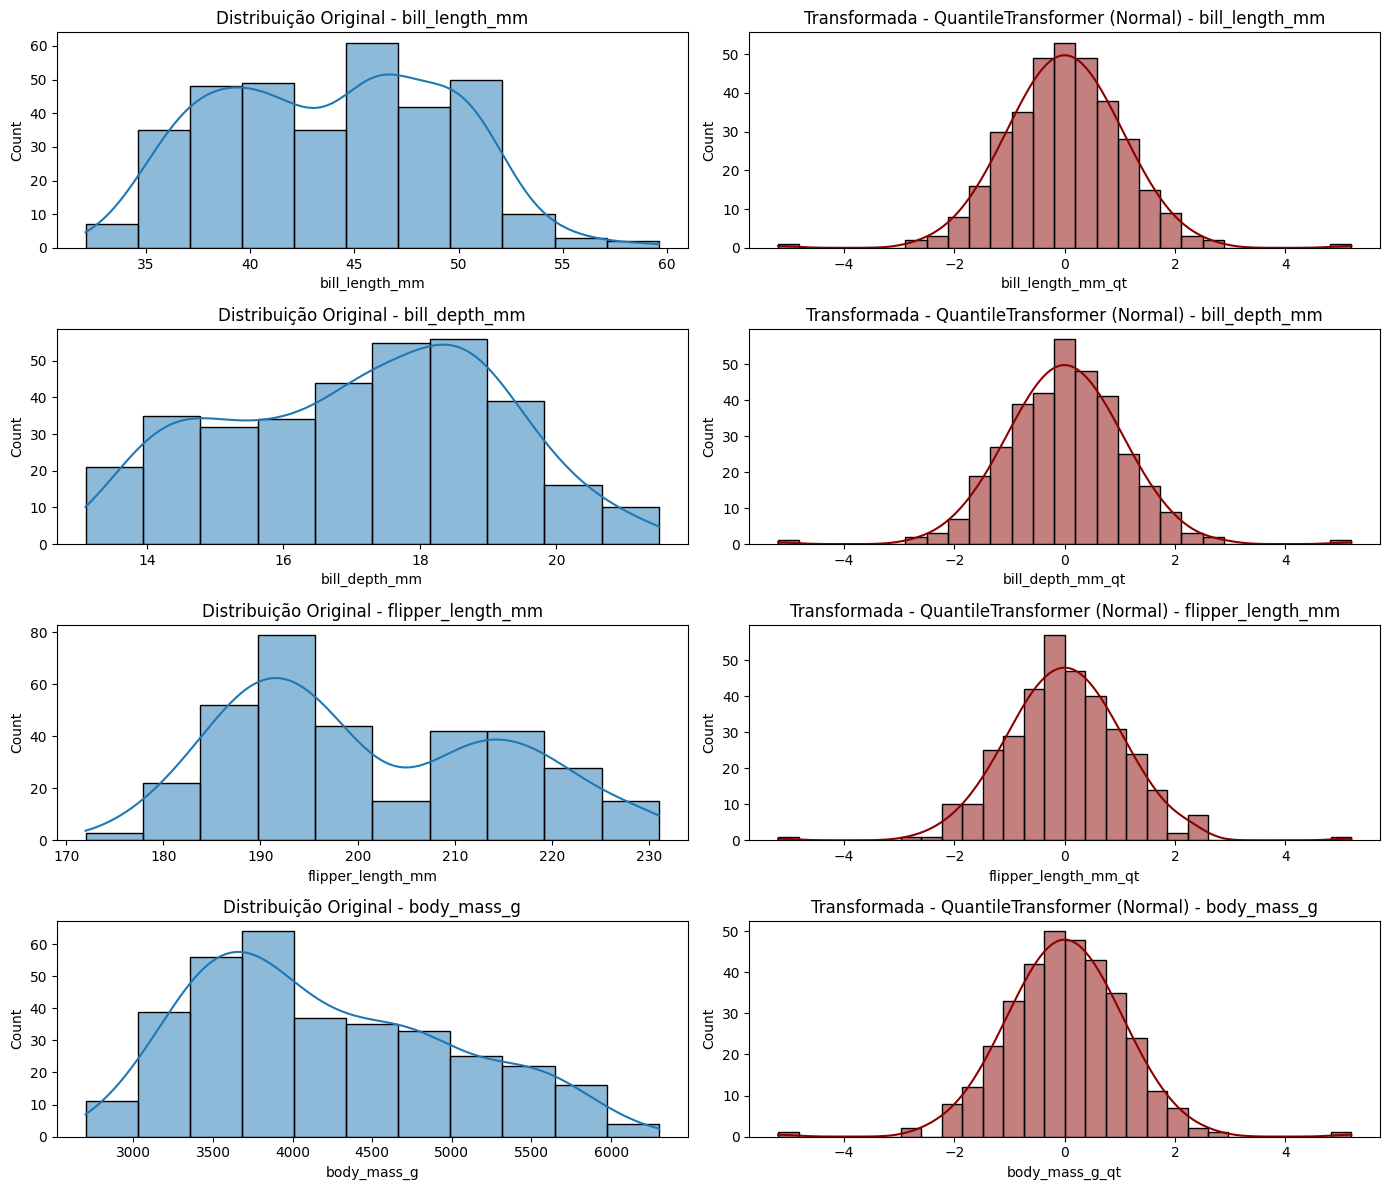

In [14]:
#Aplicando QuantileTransformer para normalização agressiva

variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Aplica o QuantileTransformer para distribuição normal
qt = QuantileTransformer(output_distribution='normal', random_state=0)
df_qt = pd.DataFrame(
    qt.fit_transform(df),
    columns=[col + '_qt' for col in df.columns]
)

# Junta com os dados originais
df_completo = pd.concat([df, df_qt], axis=1)

# Visualização comparativa
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

for i, var in enumerate(variaveis):
    sns.histplot(df[var], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f'Distribuição Original - {var}')
    
    sns.histplot(df_qt[var + '_qt'], kde=True, color='darkred', ax=axs[i][1])
    axs[i][1].set_title(f'Transformada - QuantileTransformer (Normal) - {var}')

plt.tight_layout()
plt.show()


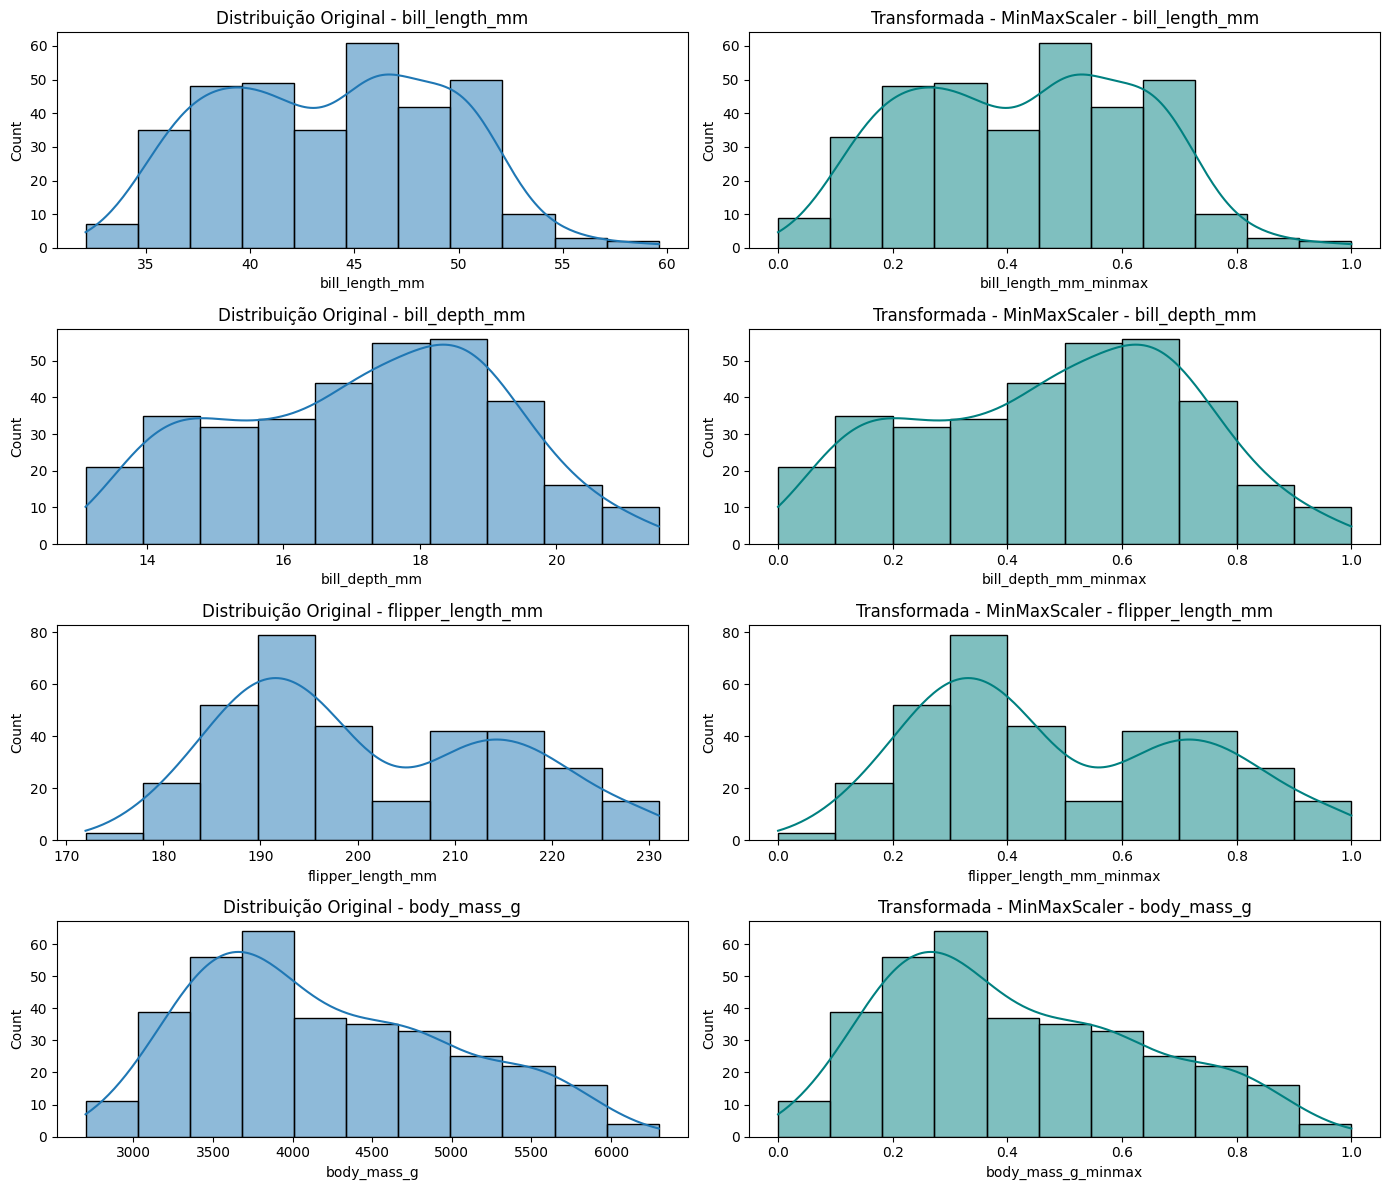

In [18]:


# Carregar dados e selecionar variáveis contínuas
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[variaveis].dropna()

# Aplica a normalização Min-Max
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler.fit_transform(df),
    columns=[col + '_minmax' for col in df.columns]
)

# Junta os dados normalizados aos originais
df_completo = pd.concat([df, df_minmax], axis=1)

# Visualização comparativa
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

for i, var in enumerate(variaveis):
    sns.histplot(df[var], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f'Distribuição Original - {var}')
    
    sns.histplot(df_minmax[var + '_minmax'], kde=True, color='teal', ax=axs[i][1])
    axs[i][1].set_title(f'Transformada - MinMaxScaler - {var}')

plt.tight_layout()
plt.show()


/tmp/ipykernel_965567/1909283174.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra = df_norm.groupby('species').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)


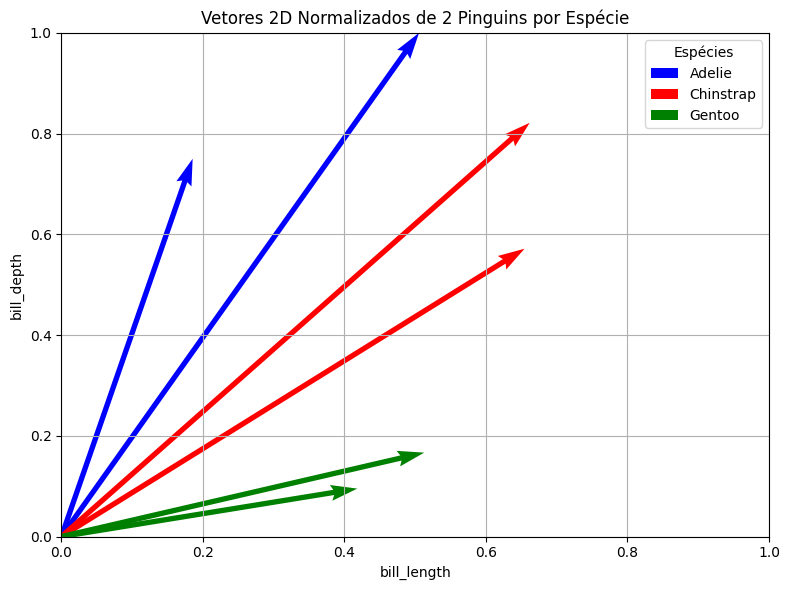

In [19]:

# Carrega dados e seleciona variáveis
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm']
df = df[variaveis + ['species']].dropna()

# Aplica normalização Min-Max
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(df[variaveis])
df_norm = pd.DataFrame(X_norm, columns=[v + '_minmax' for v in variaveis])
df_norm['species'] = df['species'].values

# Seleciona 2 pinguins por espécie
amostra = df_norm.groupby('species').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)

# Cores por espécie
cores = {
    'Adelie': 'blue',
    'Gentoo': 'green',
    'Chinstrap': 'red'
}

# Plotagem dos vetores 2D
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(amostra)):
    vetor = amostra.iloc[i, :2].values
    especie = amostra.iloc[i, 2]
    ax.quiver(0, 0, vetor[0], vetor[1],
              angles='xy', scale_units='xy', scale=1,
              color=cores[especie], label=f'{especie}' if f'{especie}' not in ax.get_legend_handles_labels()[1] else "")

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('bill_length')
ax.set_ylabel('bill_depth')
ax.set_title('Vetores 2D Normalizados de 2 Pinguins por Espécie')
ax.grid(True)
ax.legend(title='Espécies')
plt.tight_layout()
plt.show()


/tmp/ipykernel_965567/1503316748.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra = df.groupby('species').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)


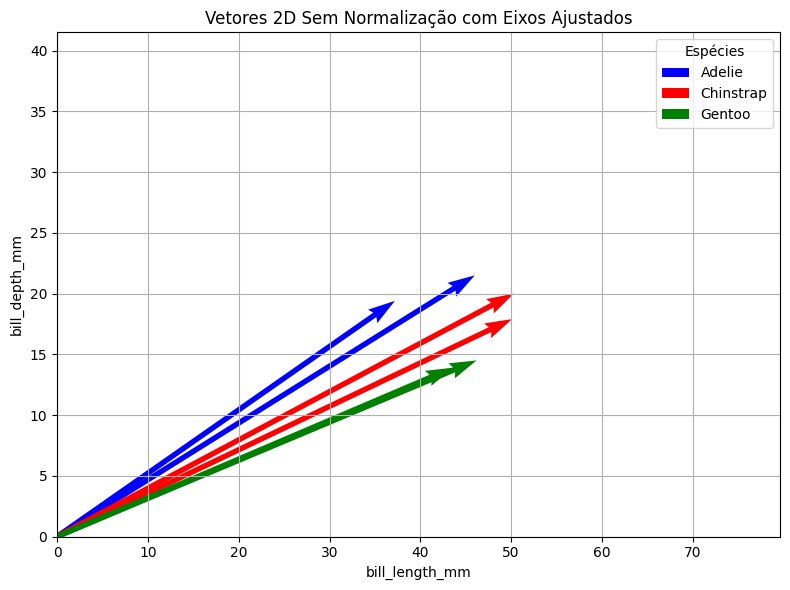

In [21]:


# Carrega dados e seleciona variáveis
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm']
df = df[variaveis + ['species']].dropna()

# Seleciona 2 pinguins por espécie
amostra = df.groupby('species').apply(lambda x: x.sample(2, random_state=42)).reset_index(drop=True)

# Cores por espécie
cores = {
    'Adelie': 'blue',
    'Gentoo': 'green',
    'Chinstrap': 'red'
}

# Define limites dos eixos
limite_x = df['bill_length_mm'].max() + 20
limite_y = df['bill_depth_mm'].max() + 20

# Plotagem dos vetores 2D
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(amostra)):
    vetor = amostra.iloc[i][variaveis].values
    especie = amostra.iloc[i]['species']
    ax.quiver(0, 0, vetor[0], vetor[1],
              angles='xy', scale_units='xy', scale=1,
              color=cores[especie], label=f'{especie}' if f'{especie}' not in ax.get_legend_handles_labels()[1] else "")

ax.set_xlim([0, limite_x])
ax.set_ylim([0, limite_y])
ax.set_xlabel('bill_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_title('Vetores 2D Sem Normalização com Eixos Ajustados')
ax.grid(True)
ax.legend(title='Espécies')
plt.tight_layout()
plt.show()


In [24]:

# Carregar dados
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[variaveis].dropna()

# Aplica o StandardScaler
scaler = StandardScaler()
df_padronizado = pd.DataFrame(
    scaler.fit_transform(df),
    columns=[v + '_std' for v in variaveis]
)

# Visualiza os dados padronizados
print(df_padronizado.describe())


       bill_length_mm_std  bill_depth_mm_std  flipper_length_mm_std  \
count        3.420000e+02       3.420000e+02           3.420000e+02   
mean         1.662088e-16       4.155221e-16          -8.310441e-16   
std          1.001465e+00       1.001465e+00           1.001465e+00   
min         -2.168526e+00      -2.054446e+00          -2.059320e+00   
25%         -8.615697e-01      -7.866355e-01          -7.773731e-01   
50%          9.686524e-02       7.547549e-02          -2.788381e-01   
75%          8.397670e-01       7.854492e-01           8.606705e-01   
max          2.875868e+00       2.205397e+00           2.142618e+00   

       body_mass_g_std  
count     3.420000e+02  
mean      8.310441e-17  
std       1.001465e+00  
min      -1.875362e+00  
25%      -8.138982e-01  
50%      -1.895079e-01  
75%       6.846384e-01  
max       2.620248e+00  


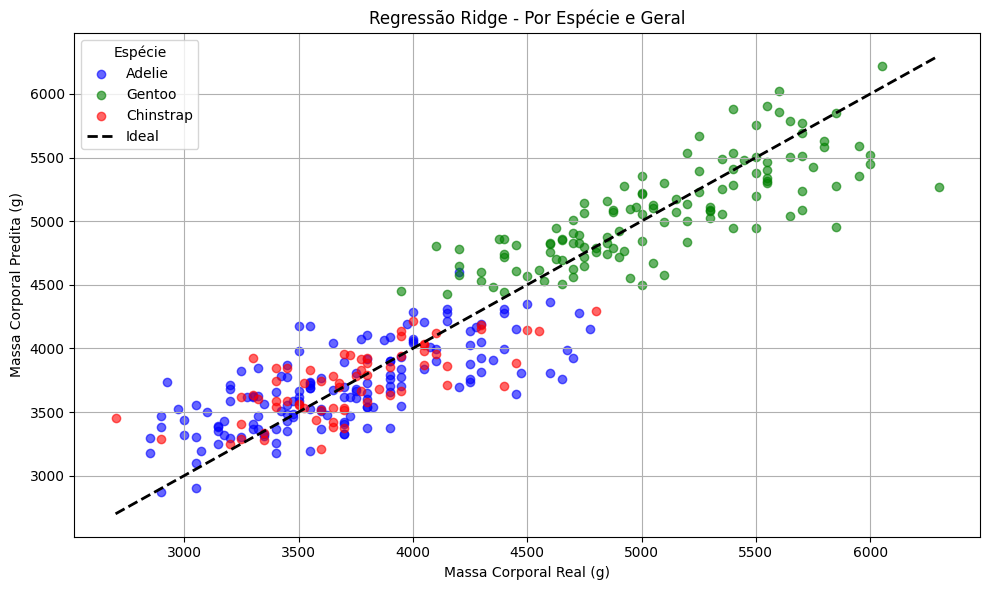

In [26]:


# Carregar os dados
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
alvo = 'body_mass_g'
df = df[variaveis + ['species', alvo]].dropna()

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[variaveis])
df_scaled = pd.DataFrame(X_scaled, columns=variaveis)
df_scaled['species'] = df['species'].values
df_scaled['body_mass_g'] = df[alvo].values

# Regressão geral
X_geral = df_scaled[variaveis].values
y_geral = df_scaled['body_mass_g'].values
modelo_geral = Ridge(alpha=1.0)
modelo_geral.fit(X_geral, y_geral)
y_pred_geral = modelo_geral.predict(X_geral)

# Plotagem
plt.figure(figsize=(10, 6))
cores = {'Adelie': 'blue', 'Gentoo': 'green', 'Chinstrap': 'red'}

for especie, cor in cores.items():
    df_e = df_scaled[df_scaled['species'] == especie]
    X_e = df_e[variaveis].values
    y_e = df_e['body_mass_g'].values
    modelo_e = Ridge(alpha=1.0)
    modelo_e.fit(X_e, y_e)
    y_pred_e = modelo_e.predict(X_e)
    plt.scatter(y_e, y_pred_e, color=cor, alpha=0.6, label=f'{especie}')

# Linha ideal
plt.plot([y_geral.min(), y_geral.max()], [y_geral.min(), y_geral.max()], 'k--', lw=2, label='Ideal')

plt.xlabel('Massa Corporal Real (g)')
plt.ylabel('Massa Corporal Predita (g)')
plt.title('Regressão Ridge - Por Espécie e Geral')
plt.grid(True)
plt.legend(title='Espécie')
plt.tight_layout()
plt.show()


/home/afect/miniconda3/envs/infnet-ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


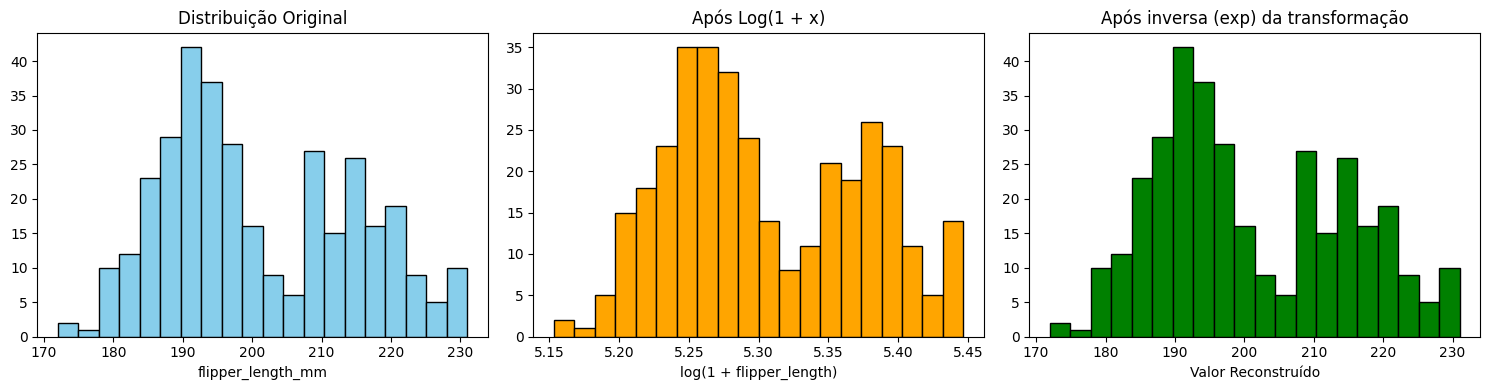

In [5]:
# 1. Carregando e limpando o dataset
df = load_penguins()
variavel = 'flipper_length_mm'
df = df[[variavel]].dropna()

# 2. Análise da distribuição original
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(df[variavel], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição Original")
plt.xlabel(variavel)

# 3. Transformação logarítmica
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
log_transformada = log_transformer.transform(df[[variavel]])

plt.subplot(1, 3, 2)
plt.hist(log_transformada, bins=20, color='orange', edgecolor='black')
plt.title("Após Log(1 + x)")
plt.xlabel("log(1 + flipper_length)")

# 4. Transformação exponencial inversa (exp) – inversa do log1p
exp_transformada = log_transformer.inverse_transform(log_transformada)

plt.subplot(1, 3, 3)
plt.hist(exp_transformada, bins=20, color='green', edgecolor='black')
plt.title("Após inversa (exp) da transformação")
plt.xlabel("Valor Reconstruído")

plt.tight_layout()
plt.show()

Estatísticas descritivas:


,massa_original,massa_power,massa_zscore
count,342.000000,3.420000e+02,3.420000e+02
mean,4201.754386,-6.419816e-14,8.310441e-17
std,801.954536,1.001465e+00,1.001465e+00
min,2700.000000,-2.465713e+00,-1.875362e+00
25%,3550.000000,-7.915181e-01,-8.138982e-01
50%,4050.000000,-5.846157e-02,-1.895079e-01
75%,4750.000000,7.703899e-01,6.846384e-01
max,6300.000000,2.095708e+00,2.620248e+00


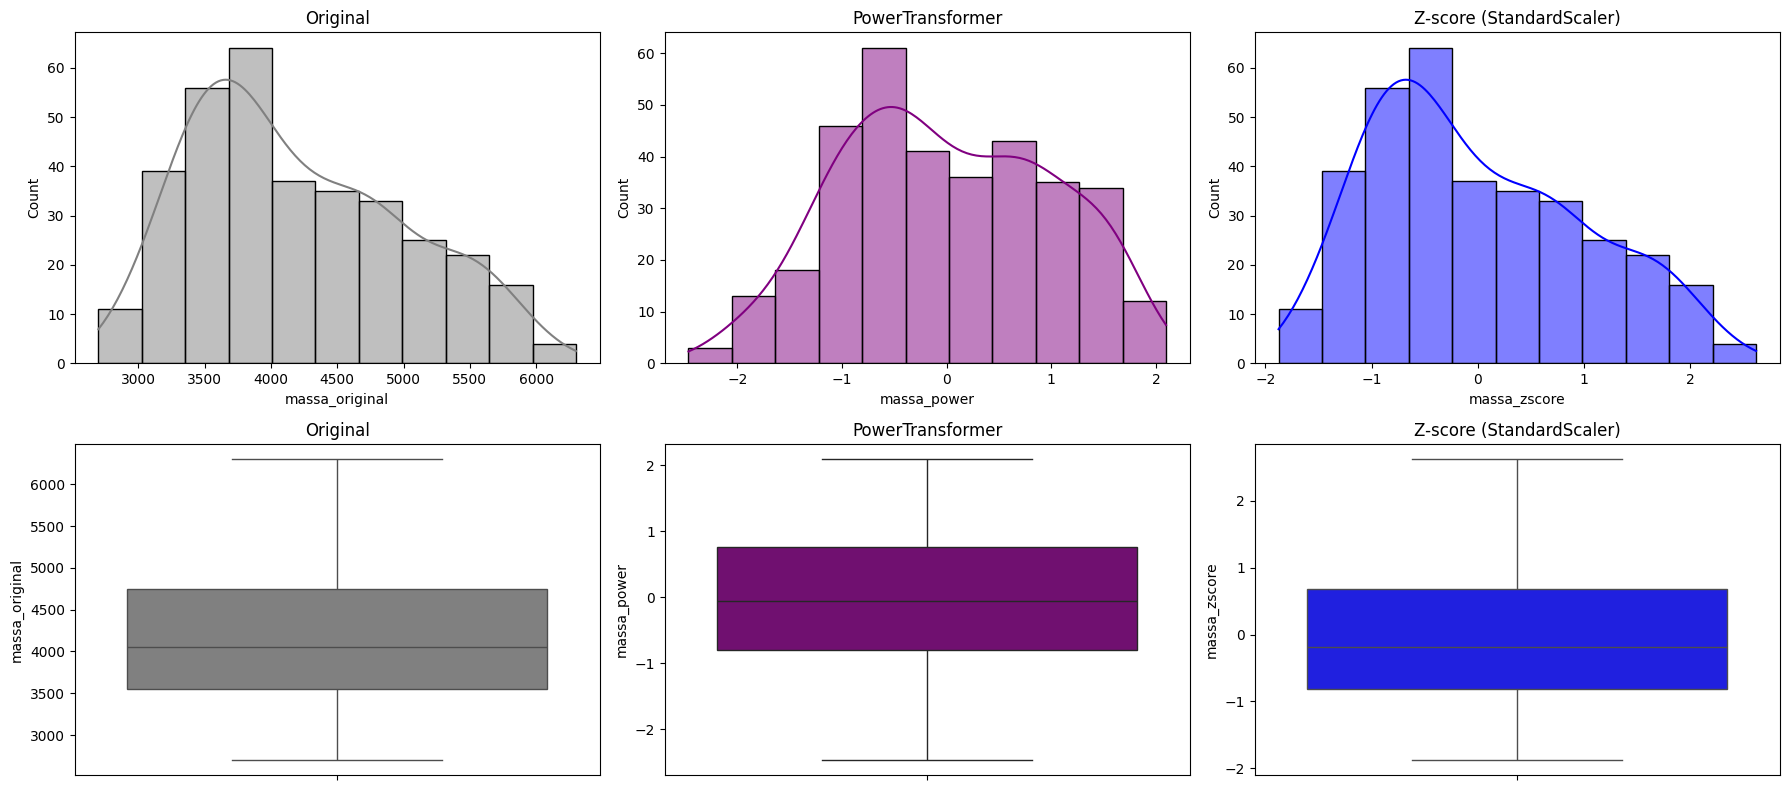

In [7]:

# 1. Carregando os dados
df = load_penguins()
variavel = 'body_mass_g'
df = df[[variavel]].dropna()

# 2. Aplicando PowerTransformer (método padrão é yeo-johnson)
power_transformer = PowerTransformer(standardize=True)
massa_power = power_transformer.fit_transform(df[[variavel]])

# 3. Aplicando StandardScaler (Z-score)
scaler = StandardScaler()
massa_zscore = scaler.fit_transform(df[[variavel]])

# 4. Adicionando as transformações ao dataframe
df['massa_original'] = df[variavel]
df['massa_power'] = massa_power
df['massa_zscore'] = massa_zscore

# 5. Estatísticas descritivas
print("Estatísticas descritivas:")
display(df[['massa_original', 'massa_power', 'massa_zscore']].describe())

# 6. Visualizações
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Histogramas
sns.histplot(df['massa_original'], kde=True, ax=axs[0, 0], color='gray')
axs[0, 0].set_title("Original")

sns.histplot(df['massa_power'], kde=True, ax=axs[0, 1], color='purple')
axs[0, 1].set_title("PowerTransformer")

sns.histplot(df['massa_zscore'], kde=True, ax=axs[0, 2], color='blue')
axs[0, 2].set_title("Z-score (StandardScaler)")

# Boxplots
sns.boxplot(y=df['massa_original'], ax=axs[1, 0], color='gray')
axs[1, 0].set_title("Original")

sns.boxplot(y=df['massa_power'], ax=axs[1, 1], color='purple')
axs[1, 1].set_title("PowerTransformer")

sns.boxplot(y=df['massa_zscore'], ax=axs[1, 2], color='blue')
axs[1, 2].set_title("Z-score (StandardScaler)")

plt.tight_layout()
plt.show()


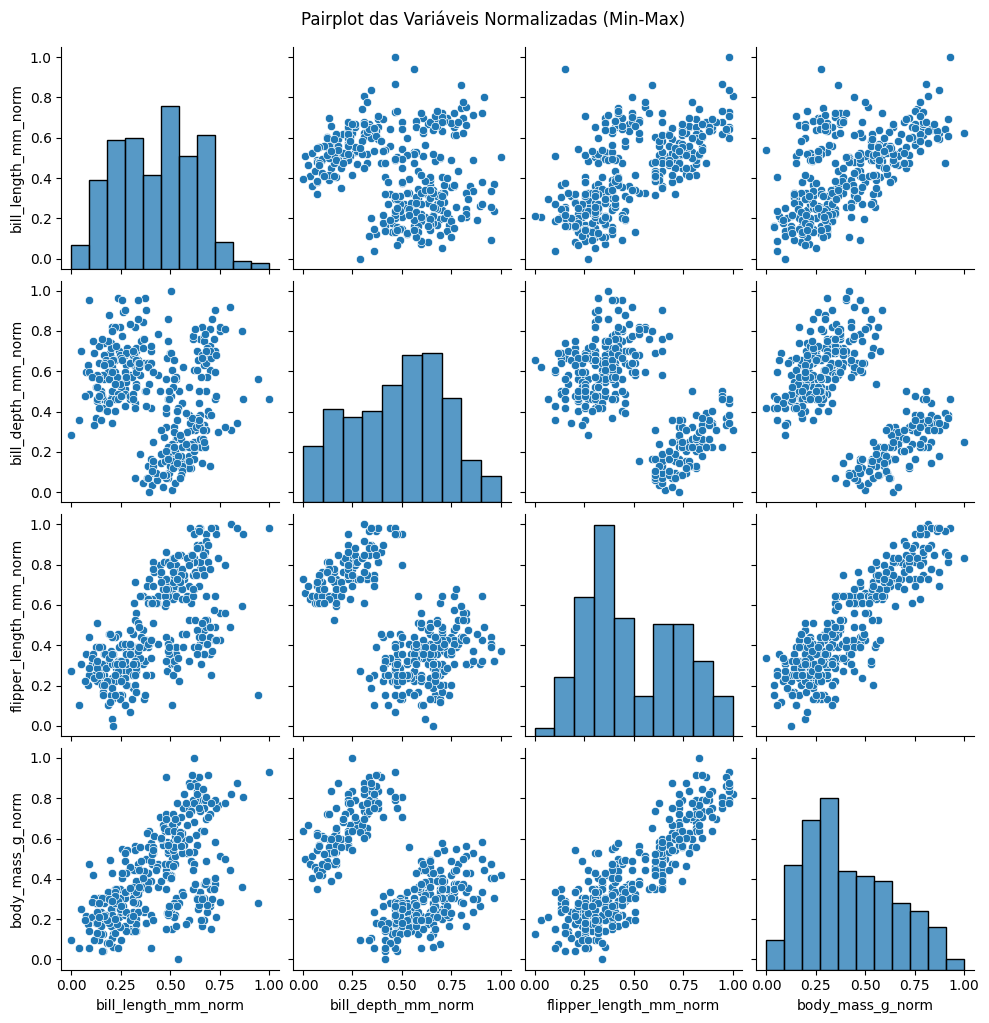

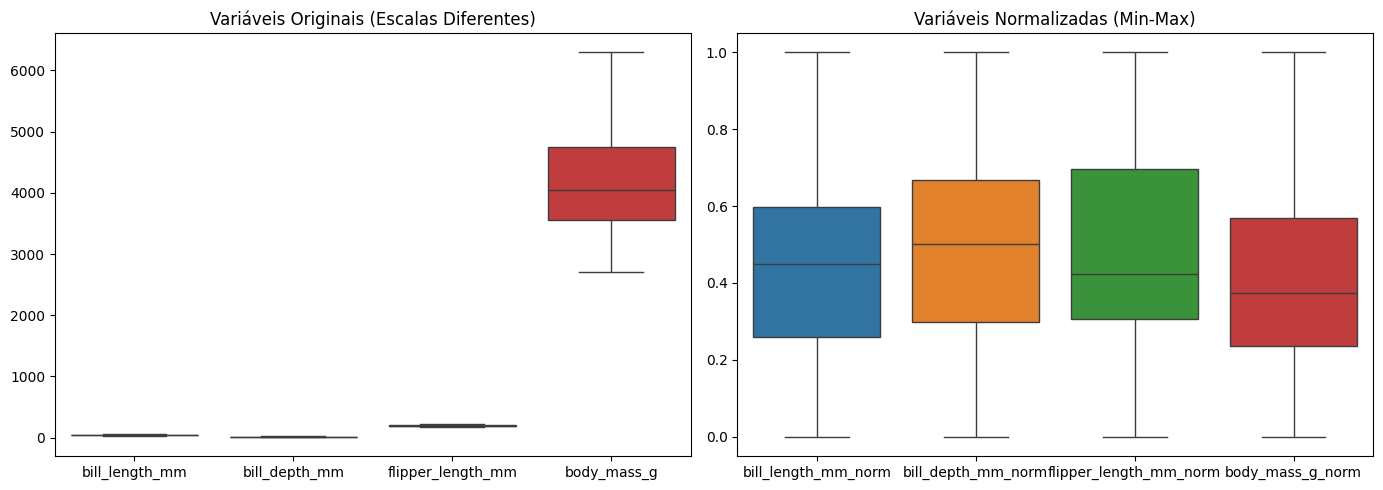

In [9]:


# 1. Carrega o dataset e seleciona algumas variáveis numéricas
df = load_penguins()
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[variaveis].dropna()

# 2. Normaliza todas com Min-Max
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=[v + '_norm' for v in variaveis])

# 3. Junta os dois DataFrames (original + normalizado)
df_comparado = pd.concat([df.reset_index(drop=True), df_normalizado.reset_index(drop=True)], axis=1)

# 4. Pairplot para comparar escalas
sns.pairplot(df_comparado[[v + '_norm' for v in variaveis]])
plt.suptitle('Pairplot das Variáveis Normalizadas (Min-Max)', y=1.02)
plt.show()

# 5. Boxplot para comparar visualmente a escala das variáveis antes e depois
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot original
sns.boxplot(data=df, ax=axs[0])
axs[0].set_title('Variáveis Originais (Escalas Diferentes)')

# Boxplot normalizado
sns.boxplot(data=df_normalizado, ax=axs[1])
axs[1].set_title('Variáveis Normalizadas (Min-Max)')

plt.tight_layout()
plt.show()


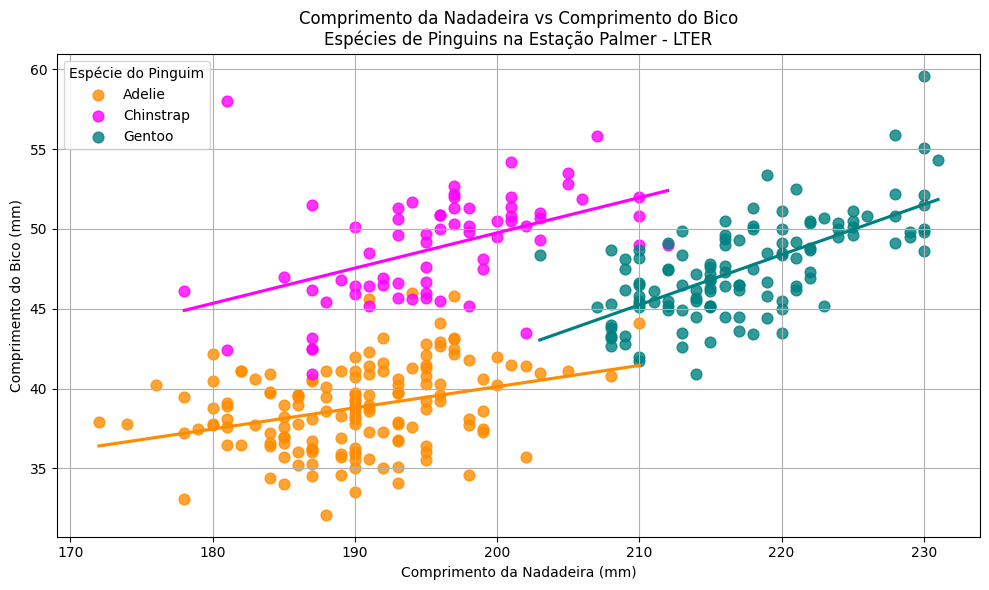

In [19]:
# Carrega e limpa o dataset
dados = load_penguins()
dados = dados[['species', 'flipper_length_mm', 'bill_length_mm']].dropna()

# Define cores e marcadores para cada espécie
estilos = {
    'Adelie': {'cor': 'darkorange', 'marcador': 'o'},
    'Chinstrap': {'cor': 'magenta', 'marcador': '^'},
    'Gentoo': {'cor': 'teal', 'marcador': 's'}
}
    # Criação da figura
plt.figure(figsize=(10, 6))
# Para cada espécie, plota os pontos e a linha de tendência
for especie, estilo in estilos.items():
    dados_especie = dados[dados['species'] == especie]
    sns.regplot(
        data=dados_especie,
        x='flipper_length_mm',
        y='bill_length_mm',
        scatter=True,
        label=especie,
        scatter_kws={'color': estilo['cor'], 'marker': estilo['marcador'], 's': 60},
        line_kws={'color': estilo['cor']},
        ci=None  # sem intervalo de confiança
    )

# Ajustes no gráfico
plt.title('Comprimento da Nadadeira vs Comprimento do Bico\nEspécies de Pinguins na Estação Palmer - LTER')
plt.xlabel('Comprimento da Nadadeira (mm)')
plt.ylabel('Comprimento do Bico (mm)')
plt.legend(title='Espécie do Pinguim')
plt.grid(True)
plt.tight_layout()
plt.show()
